In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from functools import partial

# Задание 1

Пусть $x_1,\ldots, x_n \sim U(−3θ_0, θ_0)$. Пусть $\hat θ_n = 4x_n + x_1$ — оценка для параметра $θ_0$.

In [135]:
def generate(n, theta_0):
    return np.random.uniform(low=-3*theta_0, high=theta_0, size=n)

def estimate(X):
    return 4*X[-1] + X[0]

## Смещение

In [136]:
N = list(range(10, 10000, 100))
real_theta_0 = 1
E = np.array([np.mean([estimate(generate(n, real_theta_0)) for _ in range(1000)]) for n in N])

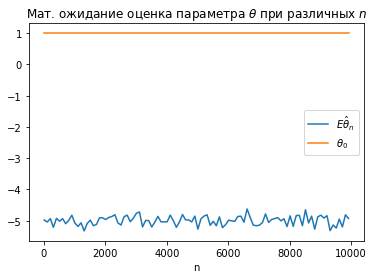

In [137]:
plt.plot(N, E, label='$E\hat θ_n$')
plt.plot([min(N), max(N)], [real_theta_0, real_theta_0], label='$θ_0$')
plt.title('Мат. ожидание оценка параметра $θ$ при различных $n$')
plt.xlabel('n')
plt.legend()
plt.show()

**Вывод:** Оценка является смещённой. 

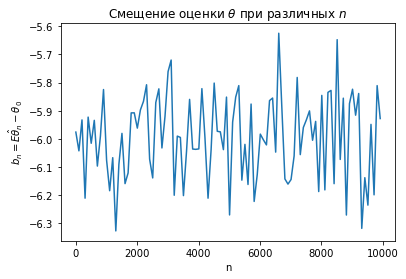

In [138]:
plt.plot(N, E-real_theta_0)
plt.title('Смещение оценки $θ$ при различных $n$')
plt.xlabel('n')
plt.ylabel('$b_n=E\hat θ_n - θ_0$')
plt.show()

In [139]:
np.mean(E - real_theta_0)

-5.994202772477625

Среднее смещение ≈ -6.

## Состоятельность

In [140]:
eps = [0.1, 1, 5, 10, 20]
P = {e: [] for e in eps}
for n in N:
    A = np.array([estimate(generate(n, real_theta_0)) for _ in range(1000)])
    A = np.abs(A - real_theta_0)
    for e in eps:
        p = np.sum(A < e) / len(A) 
        P[e].append(p)

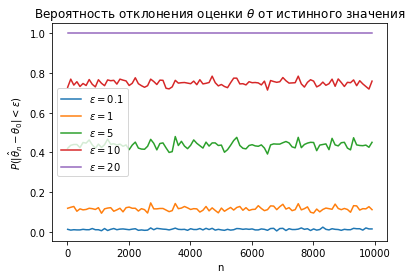

In [141]:
for e in eps:
    plt.plot(N, P[e], label=f'$ε={e}$')
plt.title('Вероятность отклонения оценки $θ$ от истинного значения')
plt.xlabel('n')
plt.ylabel('$P(|\hat θ_n - θ_0|<ε)$')
plt.legend()
plt.show()

**Вывод:** Оценка не является состоятельной, т.к. не при всех значениях ε указанная вероятность → 1 (она вообще никуда не стремится с ростом *n*). 

# Задание 2

$x_1,\ldots, x_n \sim Ber(p)$.

In [3]:
def generate(n, p):
    return np.random.binomial(1, p, size=n)

def confidence_interval(X, gamma):
    n = len(X)
    m = np.mean(X)
    z = stats.norm.ppf((1+gamma)/2)
    c = z * np.sqrt(m * (1 - m) / n)
    return m - c, m + c

## Вероятность попадания в доверительный интервал

In [143]:
real_p = 0.42
N = list(range(10, 10000, 100))
gammas = [0.5, 0.9, 0.95, 0.99]
P = {gamma: [] for gamma in gammas}
for gamma in gammas:
    for n in N:
        n, m = 0, 0
        for _ in range(1000):
            X = generate(n, real_p)
            p1, p2 = confidence_interval(X, gamma)
            if p1 < real_p < p2:
                m += 1
            n += 1
        P[gamma].append(m/n)

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3256: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


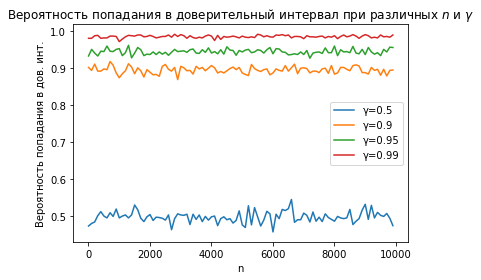

In [144]:
for gamma in gammas:
    plt.plot(N, P[gamma], label=f'γ={gamma}')

plt.title('Вероятность попадания в доверительный интервал при различных $n$ и $γ$')
plt.xlabel('n')
plt.ylabel('Вероятность попадания в дов. инт.')
plt.legend()
plt.show()

**Вывод:** Параметр *p* попадает в доверительный интервал с нужной вероятностью.

## Ширина интервала

In [4]:
real_p = 0.42
N = list(range(10, 100, 10)) + list(range(100, 1000, 100)) + list(range(1000, 2100, 1000))
gammas = [0.5, 0.9, 0.95, 0.99]
L = {gamma: [] for gamma in gammas}
for gamma in gammas:
    for n in N:
        l = []
        for _ in range(1000):
            X = generate(n, real_p)
            p1, p2 = confidence_interval(X, gamma)
            l.append(p2 - p1)
        L[gamma].append(np.mean(l))

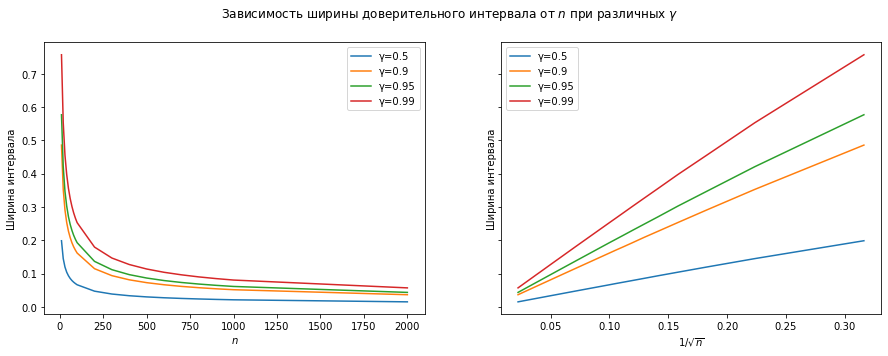

In [146]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)
for gamma in gammas:
    ax1.plot(N, L[gamma], label=f'γ={gamma}')
    ax2.plot(1/np.sqrt(np.array(N)), L[gamma], label=f'γ={gamma}')

plt.suptitle('Зависимость ширины доверительного интервала от $n$ при различных $γ$')
ax1.set_xlabel('$n$')
ax1.set_ylabel('Ширина интервала')
ax2.set_xlabel('$1/\sqrt{n}$')
ax2.set_ylabel('Ширина интервала')
ax1.legend()
ax2.legend()
plt.show()

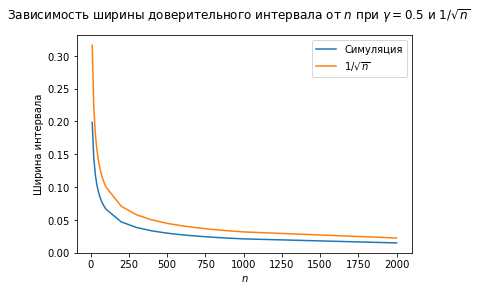

In [10]:
plt.plot(N, L[0.5], label='Симуляция')
plt.plot(N, 1/np.sqrt(np.array(N)), label='$1/\sqrt{n}$')

plt.suptitle('Зависимость ширины доверительного интервала от $n$ при $γ=0.5$ и $1/\sqrt{n}$')
plt.xlabel('$n$')
plt.ylabel('Ширина интервала')
plt.legend()
plt.show()

**Вывод:** Ширина доверительного интервала уменьшается с ростом *n* как $1/\sqrt{n}$ и для данного *n* тем шире, чем больше γ.

# Задание 3

Если $X_1,\ldots,X_2$ - независимые одинаково распределённые сл. в. с конечными мат. ожиданием $μ$ и дисперсией $σ^2$, тогда при $n\to\infty$: $\sqrt{n}\frac{\bar X_n - μ}{σ} \to N(0, 1)$ по распределению. Будем оценивать скорость сходимости с помощью величины $\sup |F^*_n(x) - Φ(x)|$, где $F^*_n$ - эмпирическая функция распределения, а $Φ$ - функция распределения стандарного нормального распределения.

In [147]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def rate(a):
    x, a_cdf = ecdf(a)
    norm_cdf = stats.norm.cdf(x)
    return np.max(np.abs(norm_cdf-a_cdf))

def prepare(a, mu=0, sigma=1):
    n = len(a)
    return (np.mean(a) - mu) / sigma * np.sqrt(n)
    

In [148]:
N = list(range(2, 10, 1)) + list(range(10, 20, 5)) + list(range(20, 110, 10))
distributions = {'uniform': {'params': {'mu': 1/2, 'sigma': 1/np.sqrt(12)}, 'func': np.random.uniform},
                'exponential': {'params': {'mu': 1, 'sigma': 1}, 'func': np.random.standard_exponential},
                'beta': {'params': {'mu': stats.beta.mean(a=2, b=5), 'sigma': stats.beta.std(a=2, b=5)}, 'func': partial(stats.beta.rvs, a=2, b=5)},
                'Bernoulli': {'params': {'mu': 0.5, 'sigma': 0.5}, 'func': partial(np.random.binomial, n=1, p=0.5)}}

rates = {d: [] for d in distributions}
for d in distributions:
    for n in N:
        Z = []
        for _ in range(100):
            Y = []
            for _ in range(100):
                x = distributions[d]['func'](size=n)
                y = prepare(x, **distributions[d]['params'])
                Y.append(y)

            Z.append(rate(Y))
        rates[d].append(np.mean(Z))

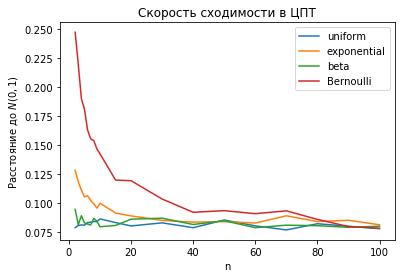

In [149]:
for d in distributions:
    plt.plot(N, rates[d], label=d)
plt.title('Скорость сходимости в ЦПТ')
plt.xlabel('n')
plt.ylabel('Расстояние до $N(0,1)$')
plt.legend()
plt.show()

**Вывод:** Скорость сходимости в условиях ЦПТ отличается для разных распределений.